In [2]:
import pandas as pd
import seaborn as sns

In [3]:
titanic = pd.read_csv("OneDrive\Pulpit\Python\Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic["Age"] = titanic["Age"].astype("int")

In [6]:
titanic = titanic.drop("Ticket",axis=1)
titanic = titanic.drop("Cabin",axis=1)

In [7]:
missing_rows = titanic.query("Embarked.isna()")
titanic = titanic.drop(missing_rows.index, axis=0)

In [8]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [26]:
sns.set(style="dark")


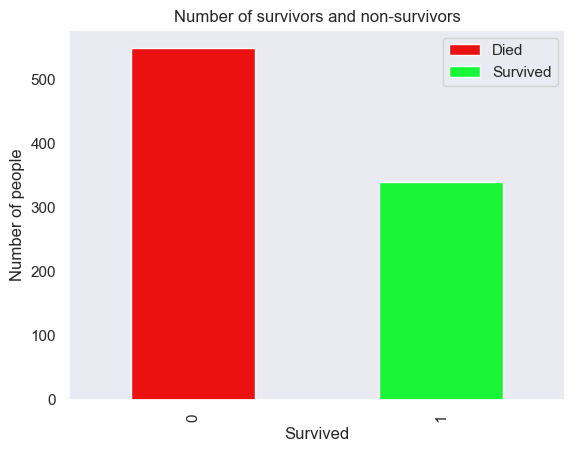

In [29]:

survivors_and_non_survivors = titanic["Survived"].value_counts().plot.bar(
title="Number of survivors and non-survivors",
color = ["#EB1111", "#1AF537"],
ylabel = "Number of people"
)

bars = survivors_and_non_survivors.patches
survivors_and_non_survivors.legend(bars,['Died', 'Survived'])


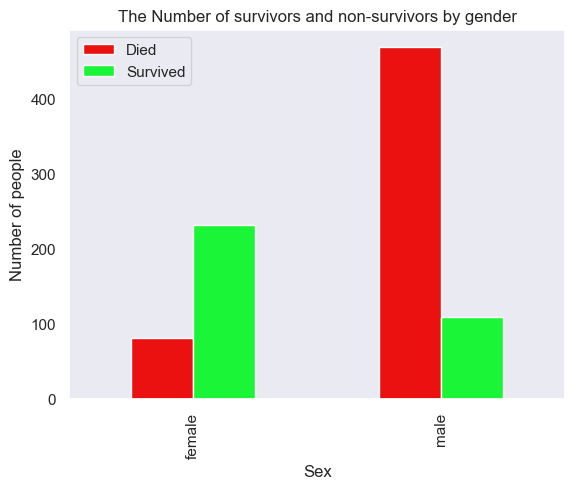

In [14]:
titanic.groupby(["Sex","Survived"])["Survived"].value_counts().unstack().plot.bar(
title = "The Number of survivors and non-survivors by gender",
color = ["#EB1111", "#1AF537"],
ylabel =  "Number of people"
).legend( ['Died', 'Survived'], loc='upper left')

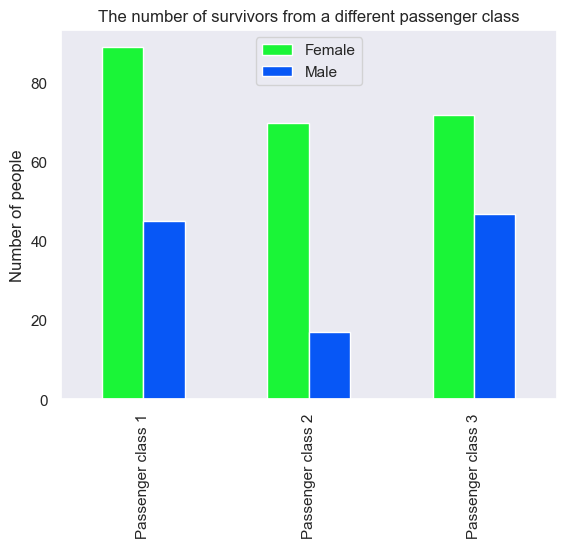

In [27]:
grouped = titanic.groupby(["Pclass","Sex"]).agg({"Survived" : "sum"}).unstack().plot.bar(
title="The number of survivors from a different passenger class",
color=["#1AF537","#0757F6"],
ylabel=  "Number of people",
xlabel = ""
)

grouped.set_xticklabels(labels=["Passenger class 1","Passenger class 2","Passenger class 3"])

grouped.legend(["Female", "Male"],loc='upper center')

In [23]:
titanic["Age"].mean()

29.498312710911136

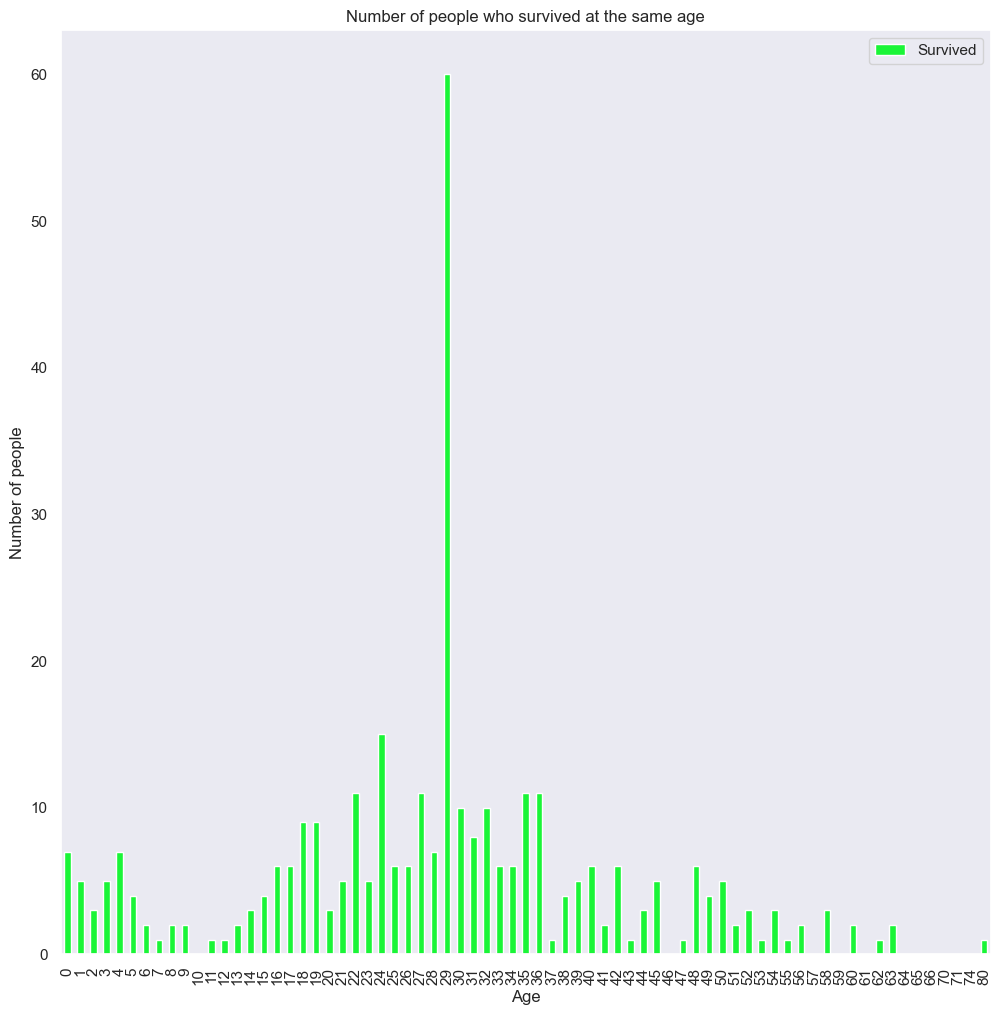

In [24]:
titanic.groupby("Age")["Survived"].sum().plot.bar(
title = "Number of people who survived at the same age",
figsize=(12, 12),
color = "#1AF537",
ylabel =  "Number of people"
).legend(["Survived"])


In [18]:
titanic["0 - 18"] = 0
titanic["19 - 40"] = 0
titanic["40+"] = 0

titanic["0 - 18"]=titanic["0 - 18"].where(~ (titanic["Age"] <= 18),1)
titanic["19 - 40"]=titanic["19 - 40"].where(~ ((titanic["Age"] > 18) & (titanic["Age"] <= 40)),1)
titanic["40+"]=titanic["40+"].where(~ (titanic["Age"] > 40),1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,0 - 18,19 - 40,40+
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,S,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C,0,1,0


<Axes: title={'center': 'People who survived by age range'}, xlabel='Age range', ylabel='Number of people'>

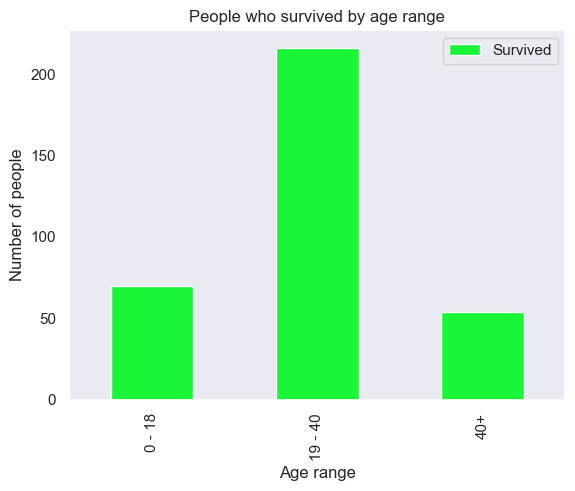

In [19]:
age_groups = ["0 - 18", "19 - 40", "40+"]
age_groupe = titanic[titanic["Survived"] == 1].groupby(age_groups)["Survived"].sum()
age_groupe = age_groupe.reset_index().drop(age_groups,axis=1)
age_groupe.iloc[[0,2]]=age_groupe.iloc[[2,0]]
age_groupe.set_index(pd.Index(age_groups)).plot.bar(
title = "People who survived by age range",     
ylabel= "Number of people",
xlabel="Age range",
color = "#1AF537",
)

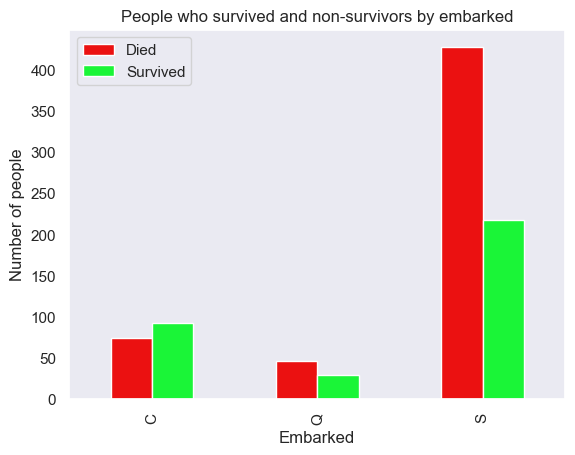

In [20]:
titanic.groupby("Embarked")["Survived"].value_counts().unstack().plot.bar(
title = "People who survived and non-survivors by embarked",     
ylabel= "Number of people",
color = ["#EB1111", "#1AF537"]
).legend( ['Died', 'Survived'], loc='upper left')


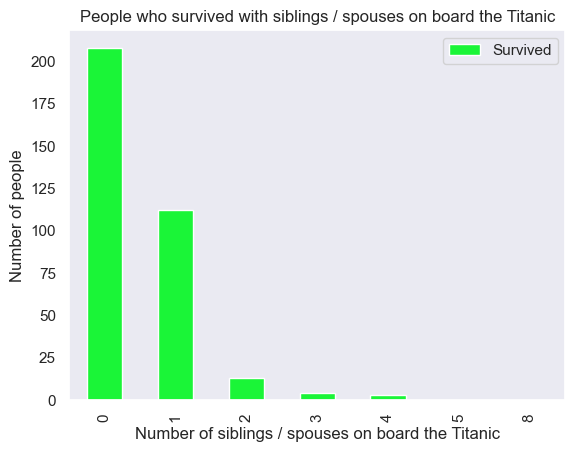

In [21]:
titanic.groupby("SibSp")["Survived"].sum().plot.bar(
title = "People who survived with siblings / spouses on board the Titanic",     
ylabel= "Number of people",
xlabel="Number of siblings / spouses on board the Titanic",
color = "#1AF537",
).legend(["Survived"])

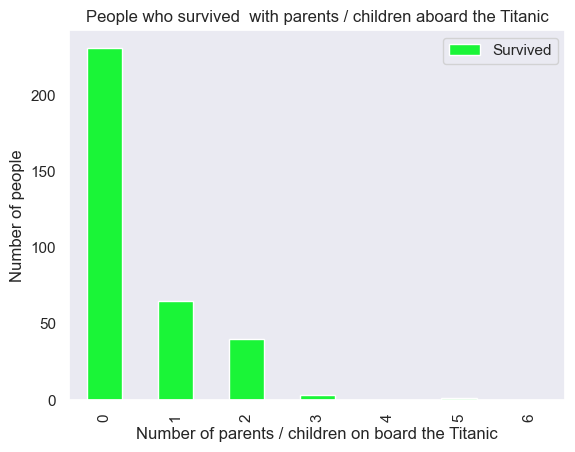

In [22]:
titanic.groupby("Parch")["Survived"].sum().plot.bar(
title = "People who survived  with parents / children aboard the Titanic",     
ylabel= "Number of people",
xlabel="Number of parents / children on board the Titanic",
color = "#1AF537",
).legend(["Survived"])